In [2]:
import numpy as np
import pagn.constants as ct
import matplotlib.pyplot as plt

#The purpose of this is to familiarise myself with some of the equations and get comfortable coding again
# I don't know if anything in here will be of any use in the future or if it is any good

In [ ]:
def R_isco_function(MBH, spin):
    #function to calculate innermost stable circular orbit for a BH of given mass and spin
    R_G=ct.G*MBH*(1/(ct.c*ct.c))
    Z_1= 1 + ((1-(spin*spin))**(1/3)) * ((1+spin)**(1/3) + (1-spin)**(1/3))
    Z_2=(3*spin*spin + Z_1*Z_1)**(1/2)
    R_isco=R_G*(3+Z_2 - ((3-Z_1)*(3+Z_1+2*Z_2))**(1/2))
    # print(f'R_isco={R_isco}')
    return R_isco

# Removed first attempt at fns for solving NT eqns in Eqn 99 Abramowicz and Fragile
# Can be found in earlier versions of code if want to look at - they weren't very good

Text(0, 0.5, 'R_isco (6R_g)')

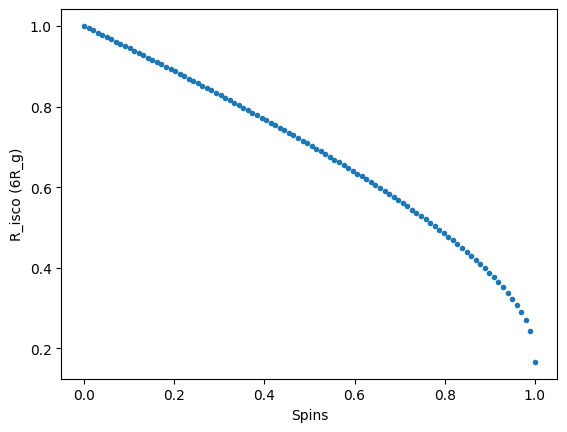

In [48]:
M=10**8*ct.MSun
#spins=0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 0.96, 0.97, 0.98,0.99, 0.999, 0.9999
spins=np.linspace(0, 1, 100)
R_iscos=[]
for spin in spins:
    R_isco=R_isco_function(M, spin)
    R_iscos.append((R_isco/(6*ct.G*M*(1/(ct.c*ct.c)))))

plt.plot(spins, R_iscos, '.')
plt.xlabel("Spins")
plt.ylabel("R_isco (6R_g)")
#plt.yscale('log')

In [336]:
MBH=1e8 * ct.MSun
M=MBH * ct.G /(ct.c*ct.c) # in units of Msol
print(MBH)
spin=0.9
alpha=0.1
eps=0.1
Mdot=0.1 #in terms of Ledd

R_G=ct.G*MBH*(1/(ct.c*ct.c))
print(f'R_G = {R_G} m')

Rmin= R_isco_function(MBH, spin) #uses relativistic eqn for ISCO to set inner edge of disc
Rmin_2 = R_G / (2 * eps) #used in pagn SirkoAGN to set inner edge of disc
Rmax=1e3*R_G #for the sake of this quick maths it doesn't really matter what this is as long as its large 

print(f'Including Relativity R_min = {Rmin/R_G} R_G')
print(f'Excluding Relativity R_min = {Rmin_2/R_G} R_G')

R=np.linspace(Rmin, Rmax, 1000000)
for r in R:
    v=np.sqrt(ct.G * MBH / (r*r*r)) * r
    vc=v/ct.c
    if vc<0.1:
        print(f'disk stops being relativistic at {r/R_G} R_G')
        break


1.98847e+38
R_G = 147666969103.34393 m
Including Relativity R_min = 2.320883041761887 R_G
Excluding Relativity R_min = 5.0 R_G
disk stops being relativistic at 100.00075002565912 R_G


In [362]:
MBH=1e8 * ct.MSun #in kgs
spin=0
alpha=0.01
eps=0.1 
Mdot=0.1 #in terms of Ledd

#general scaling from Abramowicz and Fragile
M=MBH * ct.G /(ct.c*ct.c)

print(M/1e9)

147.66696910334394


In [ ]:
# Attempt 2 at coding Eqns 99 from Abramowicz and Fragile
MBH=1e6 * ct.MSun #in kgs
spin=0
alpha=0.1
eps=0.1 
mdot=0.1 #in terms of Ledd

#general scaling from Abramowicz and Fragile
M=MBH * ct.G /(ct.c*ct.c)
m=MBH/ct.MSun

R_G=ct.G*MBH*(1/(ct.c*ct.c))
# print(f'R_G = {R_G} m')

Rmin= R_isco_function(MBH, spin) #uses relativistic eqn for ISCO to set inner edge of disc
Rmax=1e3*R_G #for the sake of this quick maths it doesn't really matter what this is as long as its large 

r_isco=R_isco_function(MBH, spin)

y0=np.sqrt(r_isco/M)

y1=2*np.cos((np.arccos(spin)- np.pi)*(1/3))
y2=2*np.cos((np.arccos(spin)+ np.pi)*(1/3))
y3=-2*np.cos((np.arccos(spin))*(1/3))

print(f'{y0}, {y1}, {y2}, {y3}')


# print(f'Including Relativity R_min = {Rmin/R_G} R_G')

R=np.linspace(r_isco, Rmax, 10000) 

Rs=[]

Fs=[]
sigmas=[]
hs=[]
rho0s=[]
Ts=[]
betas=[]
taus=[]

flag=0

for i in range(1,10000):
    r=R[i]
    y=np.sqrt(r/M)
    rstar=(r/M)
    # rstar=(ct.c*ct.c*r/(ct.G*M))

    #Radial fns in terms of y and astar (spin)
    A = 1 + (spin*spin * y**(-4)) + (2 * spin*spin * y**(-6))
    B = 1 + (spin * y**(-3))
    C = 1 - (3 * y**(-2)) + (2 * spin * y**(-3))
    D = 1 - (2 * y**(-2)) + (spin*spin * y**(-4))
    E = 1 + (4 * spin*spin * y**(-4)) - (4 * spin*spin * y**(-6)) + (3 * spin*spin*spin*spin * y**(-8))
    
    #Q radial fn broken down info fragments for error-checking reasons
    num = 1 + (spin * y**(-3))
    denom = y * (1 - 3*y**(-2) +2*spin*y**(-3))**(1/2)
    Q0 = num/denom
    
    term1= 3 * ((y1-spin)**2) / (y1 * (y1-y2)* (y1-y3)) * np.log((y-y1)/(y0-y1))
    term2= 3 * ((y2-spin)**2) / (y2 * (y2-y1)* (y2-y3)) * np.log((y-y2)/(y0-y2))
    term3= 3 * ((y3-spin)**2) / (y3 * (y3-y1)* (y3-y2)) * np.log((y-y3)/(y0-y3))

    Q=Q0*(y - y0 - (3/2)*spin*np.log(y/y0) - term1 - term2 - term3)

    sigma = 5 * (1/alpha) * (1/mdot) * rstar**(3/2) * (1/(A*A)) * B*B*B * C**(1/2) * E * (1/Q)
    sigmas.append(sigma)

    h=15/rstar * mdot * A**2 * B**(-3) * C**(1/2) * D**(-1) * E**(-1) * Q
    hs.append(h)

    Rs.append(rstar)
    # print(f'Surfacy Density Profile {sigma}'

    v=np.sqrt(ct.G * MBH / (r*r*r)) * r
    vc=v/ct.c

    if vc<0.1 and flag==0:
        print(f'disk stops being relativistic at {r/R_G} R_G')
        flag+=1
        #break




2.449489742783178, 1.7320508075688774, 1.2246467991473532e-16, -1.7320508075688774
disk stops being relativistic at 100.04180418041804 R_G


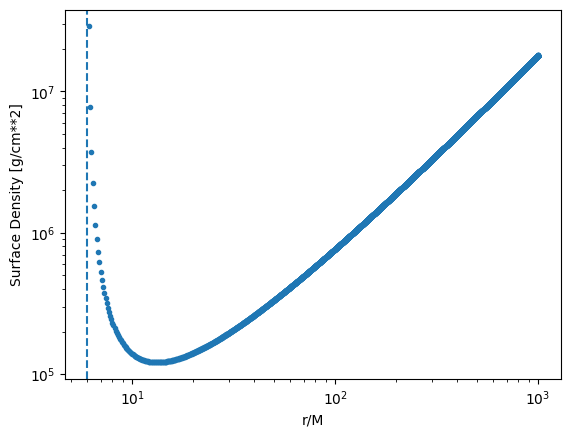

In [368]:
plt.plot(Rs, sigmas, '.')
plt.xlabel("r/M")
plt.ylabel("Surface Density [g/cm**2]")
plt.axvline(x=r_isco/M, linestyle='--')
plt.xscale('log')
plt.yscale('log')


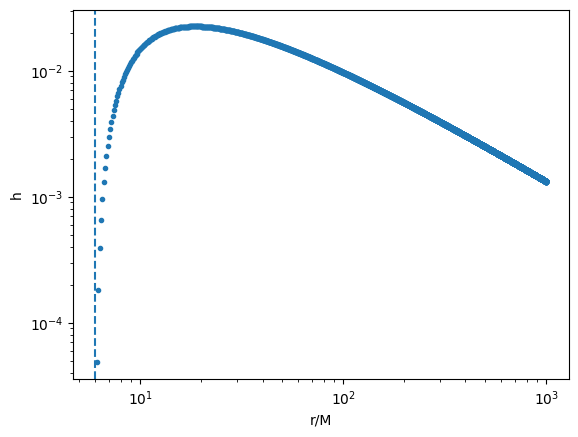

In [369]:
plt.plot(Rs, hs, '.')
plt.xlabel("r/M")
plt.ylabel("h")
plt.axvline(x=r_isco/M, linestyle='--')
plt.xscale('log')
plt.yscale('log')

In [ ]:
# Conversion of previous code to callable functions - these can all be found in NT_disk_Eqns_V1.py
# can be imported into any code to call :)

def R_isco_function(MBH, spin):
    #function to calculate innermost stable circular orbit for a BH of given mass and spin
    R_G=ct.G*MBH*(1/(ct.c*ct.c))
    Z_1= 1 + ((1-(spin*spin))**(1/3)) * ((1+spin)**(1/3) + (1-spin)**(1/3))
    Z_2=(3*spin*spin + Z_1*Z_1)**(1/2)
    R_isco=R_G*(3+Z_2 - ((3-Z_1)*(3+Z_1+2*Z_2))**(1/2))
    # print(f'R_isco={R_isco}')
    return R_isco

def y_fns(MBH, spin):
    r_isco=R_isco_function(MBH, spin)

    y0=np.sqrt(r_isco/M)

    y1=2*np.cos((np.arccos(spin)- np.pi)*(1/3))
    y2=2*np.cos((np.arccos(spin)+ np.pi)*(1/3))
    y3=-2*np.cos((np.arccos(spin))*(1/3))
    return y0, y1, y2, y3

def A_fn(y, spin):
    A = 1 + (spin*spin * y**(-4)) + (2 * spin*spin * y**(-6))
    return A

def B_fn(y, spin):
    B = 1 + (spin * y**(-3))
    return B

def C_fn(y, spin):
    C = 1 - (3 * y**(-2)) + (2 * spin * y**(-3))
    return C

def D_fn(y, spin):
    D = 1 - (2 * y**(-2)) + (spin*spin * y**(-4))
    return D

def E_fn(y, spin):
    E = 1 + (4 * spin*spin * y**(-4)) - (4 * spin*spin * y**(-6)) + (3 * spin*spin*spin*spin * y**(-8))
    return E

def Q_fn(y, MBH, spin):
    y0, y1, y2, y3= y_fns(MBH, spin)
    num = 1 + (spin * y**(-3))
    denom = y * (1 - 3*y**(-2) +2*spin*y**(-3))**(1/2)
    Q0 = num/denom
    
    term1= 3 * ((y1-spin)**2) / (y1 * (y1-y2)* (y1-y3)) * np.log((y-y1)/(y0-y1))
    term2= 3 * ((y2-spin)**2) / (y2 * (y2-y1)* (y2-y3)) * np.log((y-y2)/(y0-y2))
    term3= 3 * ((y3-spin)**2) / (y3 * (y3-y1)* (y3-y2)) * np.log((y-y3)/(y0-y3))

    Q=Q0*(y - y0 - (3/2)*spin*np.log(y/y0) - term1 - term2 - term3)
    return Q

def Sigma_NT(r, MBH, spin, mdot):
    M=MBH * ct.G /(ct.c*ct.c)
    rstar=(r/M)
    y=np.sqrt(r/M)

    A=A_fn(y, spin)
    B=B_fn(y, spin)
    C=C_fn(y, spin)
    E=E_fn(y, spin)
    Q=Q_fn(y, MBH, spin)

    sigma = 5 * (1/alpha) * (1/mdot) * rstar**(3/2) * (1/(A*A)) * B*B*B * C**(1/2) * E * (1/Q)
    return sigma

def H_NT(r, M, spin, mdot):
    M=MBH * ct.G /(ct.c*ct.c)
    y=np.sqrt(r/M)
    
    A=A_fn(y, spin)
    B=B_fn(y, spin)
    C=C_fn(y, spin)
    D=D_fn(y, spin)
    E=E_fn(y, spin)
    Q=Q_fn(y, MBH, spin)

    H=1e5 * mdot * A**2 * B**(-3) * C**(1/2) * D**(-1) * E**(-1) * Q #in cms
    return H

def T_NT(r, MBH, spin, mdot, alpha):
    M=MBH * ct.G /(ct.c*ct.c)
    m=MBH/ct.MSun
    rstar=(r/M)
    y=np.sqrt(r/M)

    A=A_fn(y, spin)
    B=B_fn(y, spin)
    E=E_fn(y, spin)

    T= (5e7) * alpha**(-1/4) * m**(-1/4) * rstar**(-3/8) * A**(-1/2) * B**(1/2) * E**(1/4) #in Kelvin
    return T

def Sigma_NT_Middle(r, MBH, spin, mdot):
    M=MBH * ct.G /(ct.c*ct.c)
    m=MBH/ct.MSun
    rstar=(r/M)
    y=np.sqrt(r/M)

    B=B_fn(y, spin)
    C=C_fn(y, spin)
    D=D_fn(y, spin)
    Q=Q_fn(y, MBH, spin)

    sigma = (9e4) * alpha**(-4/5) * m**(1/5) * mdot**(3/5) * rstar**(-3/5) * B**(-4/5) ** C**(1/2) * D**(-4/5) * Q**(3/5)
    return sigma


In [ ]:
#Eqns from Krolik 1999 to check where transition between inner and outer SS (and thereby NT) disc equations is
#And if our assumption is valid only using inner equations
#Also present in  NT_disk_Eqns_V1.py

def R_Rfn(y, MBH, spin):
    Q=Q_fn(y, MBH, spin)
    C=C_fn(y, spin)
    B=B_fn(y, spin)
    rR=Q * C**(-1/2) *B**(-1)
    return rR

def R_Tfn(y, MBH, spin):
    Q=Q_fn(y, MBH, spin)
    C=C_fn(y, spin)
    B=B_fn(y, spin)
    D=D_fn(y, spin)
    rT= Q * C**(1/2) * B**(-1) * D**(-1)
    return rT

def L_fn(y, spin):
    C=C_fn(y, spin)
    L=y * (1 - 2 * spin * y**(-3) + spin * y**(-4)) * C**(-1/2)
    return L

def Einf_fn(y, spin):
    C=C_fn(y, spin)
    Einf= (1 - 2 * y**(-2) + spin * y**(-3)) * C**(-1/2)
    return Einf

def R_Zfn(y, spin):
    L=L_fn(y, spin)
    Einf=Einf_fn(y, spin)
    rZ=y**(-2) * (L*L - spin*spin*(Einf-1))
    return rZ

def R_tr(y, MBH, spin, eps, le, alpha):
    #Davis and Tchekhovskoy 2021
    #approx location of transition between inner and outer regions for SS disc
    rR=R_Rfn(y, MBH, spin)
    rT=R_Tfn(y, MBH, spin)
    rZ=R_Zfn(y, spin)
    M=MBH * ct.G /(ct.c*ct.c)
    L_term = (0.1 * eps**(-1) * le * 10)**(16/21)
    M_term = (10 * alpha * MBH * (1e8 * ct.MSun)**(-1))**(2/21)
    R_term = rR**(6/7) * rZ**(-10/21) * rT**(-2/21)
    rTR=340 * M * L_term * M_term * R_term
    return rTR

# I don't like deleting code when made redundant, hence why this exists here and also in NT_disk_Eqns_V1.py


In [ ]:
MBH=1e8 * ct.MSun #in kgs
spin=0.9
alpha=0.01
eps=0.1 
mdot=0.1 #in terms of Ledd

le=0.5
X=0.7
b=0
Opacity='combined'

#general scaling from Abramowicz and Fragile
M=MBH * ct.G /(ct.c*ct.c)
m=MBH/ct.MSun

R_G=ct.G*MBH*(1/(ct.c*ct.c))
# print(f'R_G = {R_G} m')

Rmin= R_isco_function(MBH, spin) #uses relativistic eqn for ISCO to set inner edge of disc
Rmax=1e4*R_G #for the sake of this quick maths it doesn't really matter what this is as long as its large 

r_isco=R_isco_function(MBH, spin)

R=np.linspace(r_isco, Rmax, 100000) 

Rs=[]

Fs=[]
sigmas=[]
sigmas_nospin=[]
sigmas_mid=[]
Hs=[]
hs=[]
rho0s=[]
Ts=[]
betas=[]
taus=[]

flag=0
flag2=0

r_tr=0
r_rel=0

for i in range(1,10000):
    r=R[i]
    y=np.sqrt(r/M)
    rstar=(r/M)

    sigma=Sigma_NT(r, MBH, spin, mdot)
    sigma_mid=Sigma_NT_Middle(r, MBH, spin, mdot)

    H=H_NT(r, M, spin, mdot)
    h=15*H/(r) * 1e5

    Rs.append(rstar)
    sigmas.append(sigma)
    sigmas_mid.append(sigma_mid)
   
    Hs.append(H)
    hs.append(h)
    # print(f'Surfacy Density Profile {sigma}'

    v=np.sqrt(ct.G * MBH / (r*r*r)) * r
    vc=v/ct.c

    rTR=R_tr(y, MBH, spin, eps, le, alpha)

    if vc<0.1 and flag==0:
        print(f'disk stops being relativistic at {r/R_G} R_G')
        r_rel=r/R_G
        flag+=1
        #break
    
    if rTR/r<=1:
        print(f'Transition between Inner and Outer regimes at Approximately {r/R_G} R_G ')
        r_tr=r/R_G
        flag2+=1
        break

if r_tr>r_rel:
    print("disk stops being relativistic before transition from inner to outer - yippee!")
elif r_rel>r_tr:
    print("disk transitions between inner and outer before it stops being relativistic")
else:
    print("something has gone wrong!")

/var/folders/p3/zq_xf6g554d28rrxhsngpp_00000gr/T/ipykernel_1157/3916291143.py:96: RuntimeWarning: invalid value encountered in scalar power
  sigma = (9e4) * alpha**(-4/5) * m**(1/5) * mdot**(3/5) * rstar**(-3/5) * B**(-4/5) ** C**(1/2) * D**(-4/5) * Q**(3/5)


disk stops being relativistic at 100.09916258840893 R_G
Transition between Inner and Outer regimes at Approximately 861.7299740264019 R_G 
disk stops being relativistic before transition from inner to outer - yippee!


In [527]:
nospin=0
Rmin_nospin= R_isco_function(MBH, nospin) #uses relativistic eqn for ISCO to set inner edge of disc


R=np.linspace(Rmin_nospin, Rmax, 10000) 

Rs_nospin=[]

for i in range(1,10000):
    r=R[i]
    y=np.sqrt(r/M)
    rstar=(r/M)

    sigma_nospin=Sigma_NT(r, MBH, nospin, mdot)

    sigmas_nospin.append(sigma_nospin)
    Rs_nospin.append(rstar)

    v=np.sqrt(ct.G * MBH / (r*r*r)) * r
    vc=v/ct.c

    if vc<0.1 and flag==0:
        print(f'disk stops being relativistic at {r/R_G} R_G')
        flag+=1



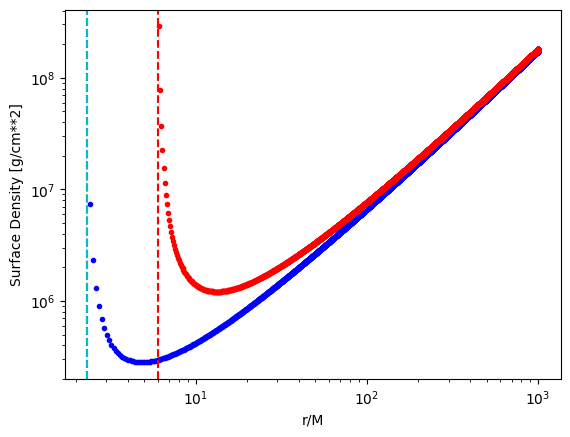

In [499]:
plt.plot(Rs, sigmas, '.', color='b')
plt.axvline(x=r_isco/M, linestyle='--', color='b')

plt.plot(Rs, sigmas_mid, '.', color='c')
plt.axvline(x=r_isco/M, linestyle='--', color='c')

plt.plot(Rs_nospin, sigmas_nospin, '.', color='r')
plt.axvline(x=Rmin_nospin/M, linestyle='--', color='r')

plt.xlabel("r/M")
plt.ylabel("Surface Density [g/cm**2]")

plt.xscale('log')
plt.yscale('log')

In [501]:
print(sigmas_mid)

[np.float64(nan), np.float64(nan), np.float64(nan), np.float64(nan), np.float64(nan), np.float64(nan), np.float64(nan), np.float64(nan), np.float64(nan), np.float64(nan), np.float64(nan), np.float64(nan), np.float64(nan), np.float64(nan), np.float64(nan), np.float64(nan), np.float64(nan), np.float64(nan), np.float64(nan), np.float64(nan), np.float64(nan), np.float64(nan), np.float64(nan), np.float64(nan), np.float64(nan), np.float64(nan), np.float64(nan), np.float64(nan), np.float64(nan), np.float64(nan), np.float64(nan), np.float64(nan), np.float64(nan), np.float64(nan), np.float64(nan), np.float64(nan), np.float64(nan), np.float64(nan), np.float64(nan), np.float64(nan), np.float64(nan), np.float64(nan), np.float64(nan), np.float64(nan), np.float64(nan), np.float64(nan), np.float64(nan), np.float64(nan), np.float64(nan), np.float64(nan), np.float64(nan), np.float64(nan), np.float64(nan), np.float64(nan), np.float64(nan), np.float64(nan), np.float64(nan), np.float64(nan), np.float64(na

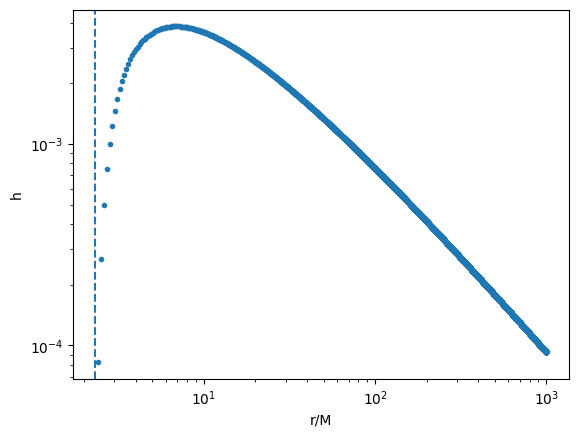

In [489]:
plt.plot(Rs, hs, '.')
plt.xlabel("r/M")
plt.ylabel("h")
plt.axvline(x=r_isco/M, linestyle='--')
plt.xscale('log')
plt.yscale('log')


In [6]:
import pagn

In [75]:

MBH=1e8 * ct.MSun #in kgs
spin=0.9
alpha=0.01
eps=0.1
mdot=0.1 #in terms of Ledd

le=0.01
X=0.7
b=0
Opacity='combined'

#general scaling from Abramowicz and Fragile
M=MBH * ct.G /(ct.c*ct.c)
m=MBH/ct.MSun

R_G=ct.G*MBH*(1/(ct.c*ct.c))
# print(f'R_G = {R_G} m')

Rmin= R_isco_function(MBH, spin) #uses relativistic eqn for ISCO to set inner edge of disc
Rmax=1e4*R_G #for the sake of this quick maths it doesn't really matter what this is as long as its large 

r_isco=R_isco_function(MBH, spin)

R=np.linspace(r_isco, Rmax, 100000) 

Rs=[]

Fs=[]
sigmas=[]
sigmas_nospin=[]
sigmas_mid=[]
Hs=[]
hs=[]
rho0s=[]
Ts=[]
betas=[]
taus=[]

flag=0
flag2=0

r_tr=0
r_rel=0

for i in range(1,10000):
    r=R[i]
    y=np.sqrt(r/M)
    rstar=(r/M)

    sigma=Sigma_NT(r, MBH, spin, mdot)
    sigma_mid=Sigma_NT_Middle(r, MBH, spin, mdot)

    H=H_NT(r, M, spin, mdot)
    h=15*H/(r) * 1e5


    Rs.append(rstar)
    sigmas.append(sigma)
    sigmas_mid.append(sigma_mid)
   
    Hs.append(H)
    hs.append(h)
    # print(f'Surfacy Density Profile {sigma}'

    v=np.sqrt(ct.G * MBH / (r*r*r)) * r
    vc=v/ct.c

    if vc<0.1 and flag==0:
        print(f'disk stops being relativistic at {r/R_G} R_G')
        r_rel=r
        flag+=1

/var/folders/p3/zq_xf6g554d28rrxhsngpp_00000gr/T/ipykernel_1157/3916291143.py:96: RuntimeWarning: invalid value encountered in scalar power
  sigma = (9e4) * alpha**(-4/5) * m**(1/5) * mdot**(3/5) * rstar**(-3/5) * B**(-4/5) ** C**(1/2) * D**(-4/5) * Q**(3/5)


disk stops being relativistic at 100.09916258840893 R_G


### Sirko & Goodman 2003 parameters ###
Mbh = 1.000000e+08 MSun
Mdot = 2.596689e-02 MSun/yr
le = 0.01
Rs = 9.570121e-06 pc
Rmin = 2.500000e+00 Rs
Rmax = 1.000000e+07 Rs, 9.570121e+01 pc
alpha = 0.01
b = 0
eps = 0.1
X = 0.7
Opacity = combined

debug = False
xtol = 1e-10
root method = lm
Q<1 at i=3550 (R=9.71e+02 Rs)
Beginning star formation at index 3550
Mdisk = 91092263.30802898 Msun
Mdisk/Mbh = 0.9109226330802896


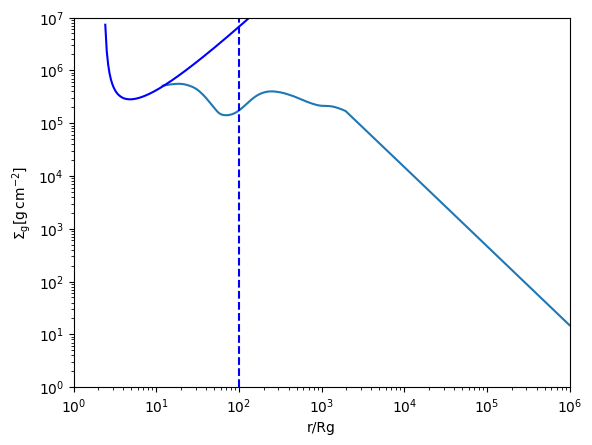

In [78]:
le=0.01
alpha=0.01
eps = 0.1
MBH=1e8*ct.MSun
Rsch= 2*ct.G*MBH/ct.c**2
R_G=ct.G*MBH*(1/(ct.c*ct.c))

disk = pagn.SirkoAGN(Mbh=MBH, alpha=alpha, le= le, eps=eps)
Rmin = disk.Rmin
Rmax = disk.Rmax
disk.solve_disk()

Sigma = 2*disk.rho*disk.h

plt.plot(disk.R/R_G, 2*disk.h*disk.rho*ct.SI_to_gcm2, label = r"$\Sigma_{\rm g} [{\rm g cm}^{-2}]$")
plt.ylabel(r'$\Sigma_{\rm g} [{\rm g \, cm}^{-2}]$')
plt.xlabel("r/Rg")

plt.xlim(1, 1e6)
plt.ylim(1, 1e7)
plt.xscale('log')
plt.yscale('log')

plt.plot(Rs, sigmas, '-', color='b')

plt.axvline(x=r_rel/R_G, linestyle='--', color='b')

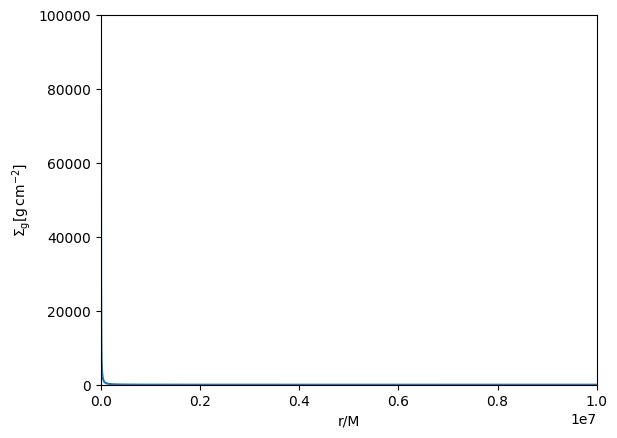

In [79]:
plt.plot(disk.R/M, 2*disk.h*disk.rho*ct.SI_to_gcm2, label = r"$\Sigma_{\rm g} [{\rm g cm}^{-2}]$")
plt.ylabel(r'$\Sigma_{\rm g} [{\rm g \, cm}^{-2}]$')
plt.xlabel("r/M")
plt.xlim(0, 1e7)
plt.ylim(0, 1e5)

plt.plot(Rs, sigmas, '-', color='b')
# plt.axvline(x=r_isco/M, linestyle='--', color='b')

# plt.plot(Rs_nospin, sigmas_nospin, '-', color='r')
# plt.axvline(x=Rmin_nospin/M, linestyle='--', color='r')


In [ ]:
# Eqns to check if/when an EMRI enters the LISA band 
# also all present in NT_disk_Eqns_V1.py to be called

def GW_freq_fn(r, MBH, m):
    M=MBH+m
    f= 1/np.pi * (ct.G * M * 1/(r*r*r))**(1/2)
    return f

def LISAband_flag(Rstart, Rmin, MBH, m):
    lisa_flag=0
    lisa_radii=0
    R=np.linspace(Rstart, Rmin, 10000)
    for r in R:
        GW_f=GW_freq_fn(r, MBH, m)
        R_G=ct.G*MBH*(1/(ct.c*ct.c))
        if 1.0>GW_f>0.0001 and lisa_flag==0:
            print(f'EMRI enters LISA band at {r/R_G} R_G')
            lisa_radii+=r
            lisa_flag+=1
    if lisa_flag==0:
        print("EMRI doesnt enter LISA band")
    return lisa_flag, lisa_radii

In [4]:
MBH=1.995e7 * ct.MSun #in kgs
m= 1.030e1 * ct.MSun

spin=0.99

R_G=ct.G*MBH*(1/(ct.c*ct.c))
# print(f'R_G = {R_G} m')

Rmin= R_isco_function(MBH, spin) #uses relativistic eqn for ISCO to set inner edge of disc
Rmax=1e4*R_G #for the sake of this quick maths it doesn't really matter what this is as long as its large 

r_isco=R_isco_function(MBH, spin)

LISAband_flag(Rmax, r_isco, MBH, m)


NameError: name 'LISAband_flag' is not defined